## Preambule

In [1]:
# General packages
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path
import xarray as xr
import json

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.colors import n_colors

## Read

In [2]:
path_main = Path("K:/Code/EffortSharing/")
path_data = Path("K:/Data/Data_EffortSharing/DataUpdate_ongoing/")
path_figs = path_main / "Figures" / "NZreport"

In [3]:
xr_dataread = xr.open_dataset(path_data / "xr_dataread.nc")
all_regions_iso = np.load(path_data / "all_regions.npy")
all_regions_names = np.load(path_data / "all_regions_names.npy")
all_countries_iso = np.load(path_data / "all_countries.npy", allow_pickle=True)
all_countries_names = np.load(path_data / "all_countries_names.npy", allow_pickle=True)

In [7]:
xr_allocs = []
for cty in ['USA', 'EU', 'IND', 'CHN', 'JPN']:#, 'AUS', 'BRA', 'RUS', 'ZAF']:
    xr_allocs.append(xr.open_dataset(path_data / "Allocations_CO2_excl" / ("xr_alloc_"+cty+".nc")).expand_dims({'Region':[cty]})[['ECPC', 'PCC', 'AP']].sel(Temperature=1.6, Risk=0.5, NegEmis=0.5, NonCO2red=0.5, Timing='Immediate', Scenario='SSP2'))
xr_allocs = xr.merge(xr_allocs)

## Plot

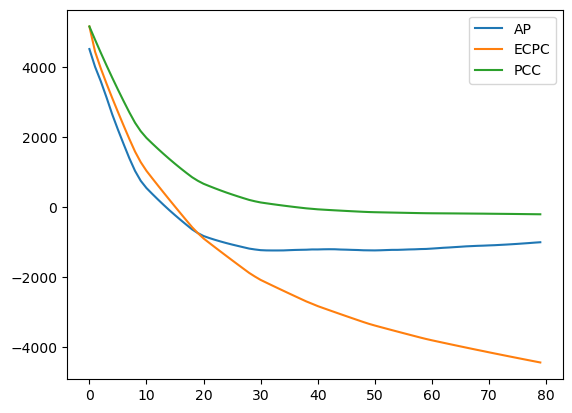

In [11]:
reg = 'USA'
plt.plot(xr_allocs.sel(Region=reg).AP, label='AP')
plt.plot(xr_allocs.sel(Region=reg).ECPC.mean(dim=['Discount_factor', 'Historical_startyear']), label='ECPC')
plt.plot(xr_allocs.sel(Region=reg).PCC.mean(dim='Convergence_year'), label='PCC')
plt.legend()

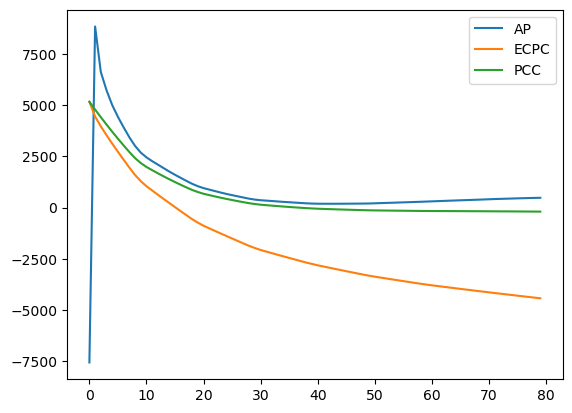

In [30]:
plt.plot(xr_allocs.sel(Region='USA').AP, label='AP')
plt.plot(xr_allocs.sel(Region='USA').ECPC.mean(dim=['Discount_factor', 'Historical_startyear']), label='ECPC')
plt.plot(xr_allocs.sel(Region='USA').PCC.mean(dim='Convergence_year'), label='PCC')
plt.legend()

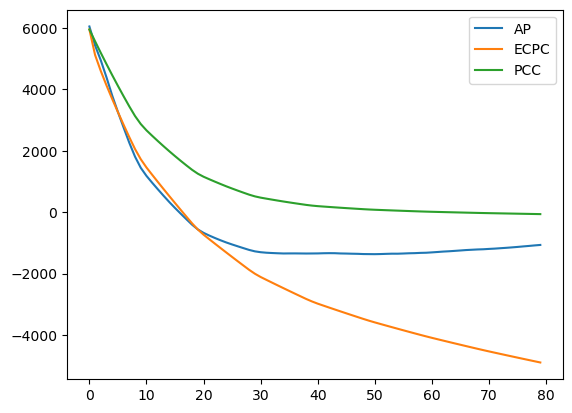

In [32]:
plt.plot(xr_allocs.sel(Region='USA').AP, label='AP')
plt.plot(xr_allocs.sel(Region='USA').ECPC.mean(dim=['Discount_factor', 'Historical_startyear']), label='ECPC')
plt.plot(xr_allocs.sel(Region='USA').PCC.mean(dim='Convergence_year'), label='PCC')
plt.legend()